# Correction détaillée du TD

## Étape 1 : Lecture des données
La fonction `read_booknlp` pour charger les données :


In [53]:
def read_booknlp(path_book):
    with open(path_book, "r", encoding="utf-8") as file:
        lines = file.readlines()
        # eval() transforme une chaîne de caractères représentant un dictionnaire en objet Python
        dicts = [eval(line.strip()) for line in lines if line.strip()]
    return dicts[:10]# On ne prends que les 10 premiers personnages pour un roman

In [54]:
path = "BOOK_FILES/1880_Zola-Emile_Nana.book"
book_nana = read_booknlp(path)

### Le premier personnage est donc bien Nana

In [55]:
book_nana[0]["mentions"]['proper'][0]

{'n': 'nana', 'c': 821}

In [56]:
book_nana[0]['gender']["inference"]["Female"]

0.99

### Lecture de tous nos fichiers book

In [43]:
import glob

all_data = []
chemin_fichiers = "BOOK_FILES/*.book"

for path in glob.glob(chemin_fichiers):
    data = read_booknlp(path)
    all_data.extend(data)

In [44]:
len(all_data)

1000

## Étape 2 : Extraction des verbes associés à chaque genre
La fonction `get_characterization` pour obtenir les verbes liés aux personnages masculins et féminins :


In [45]:
def get_characterization(booknlp_data):
    list_verb_suj_male, list_verb_suj_female = [], []
    for i in range(len(booknlp_data)):
        if booknlp_data[i]['gender']["inference"]["Female"] > 0.8:
            list_verb_suj_female.append([item['w'] for item in booknlp_data[i]['agent']])
        elif booknlp_data[i]['gender']["inference"]["Male"] > 0.8:
            list_verb_suj_male.append([item['w'] for item in booknlp_data[i]['agent']])
        else:
            continue
    return list_verb_suj_male, list_verb_suj_female

### Pour Nana seulement

In [46]:
verbes_male, verbes_female = get_characterization(book_nana)

### Pour tous nos fichiers book

In [47]:
verbes_male, verbes_female = get_characterization(all_data)

## Étape 3 : Calcul du score d'association pour chaque verbe fréquent
On détermine les verbes fréquents (présents chez au moins 1 % des personnages). Ensuite, pour chaque verbe fréquent, on calcule les proportions d'apparition chez les personnages masculins et féminins avec la fonction `test_apparition_mot`

In [48]:
def test_apparition_mot(mot, verbes_masculins, verbes_feminins):
    conteur_apparition_male, conteur_apparition_female = 0, 0
    for liste_personnage in verbes_masculins:
        if mot in liste_personnage:
            conteur_apparition_male +=1

    for liste_personnage in verbes_feminins:
        if mot in liste_personnage:
            conteur_apparition_female +=1
    return conteur_apparition_male/len(verbes_masculins), conteur_apparition_female/len(verbes_female)

In [49]:
test_apparition_mot("courir", verbes_male, verbes_female)

(0.2815198618307427, 0.31715210355987056)

In [101]:
liste_verbes_frequents = ["poursuivre", "découvrir", "tirer", "courir", "manger", "trouver", "adorer", "aimer", 'rire', 'crier', "danser"]  # Remplacer par vos verbes fréquents
scores_association = {}

for verbe in liste_verbes_frequents:
    prop_mas, prop_fem = test_apparition_mot(verbe, verbes_male, verbes_female)
    score = (prop_fem - prop_mas) / (prop_mas + prop_fem) if (prop_mas + prop_fem) != 0 else 0
    scores_association[verbe] = score

In [102]:
scores_association

{'poursuivre': -0.18734037412852908,
 'découvrir': -0.01971418732782368,
 'tirer': -0.15659918132536782,
 'courir': 0.05951880794331007,
 'manger': -0.10211677134217263,
 'trouver': -0.02546147433607242,
 'adorer': 0.11769318935875005,
 'aimer': 0.05719125013514,
 'rire': 0.05328163148068362,
 'crier': -0.1304297597042514,
 'danser': 0.3697993147332354}

## Étape 4 : Visualisation des résultats

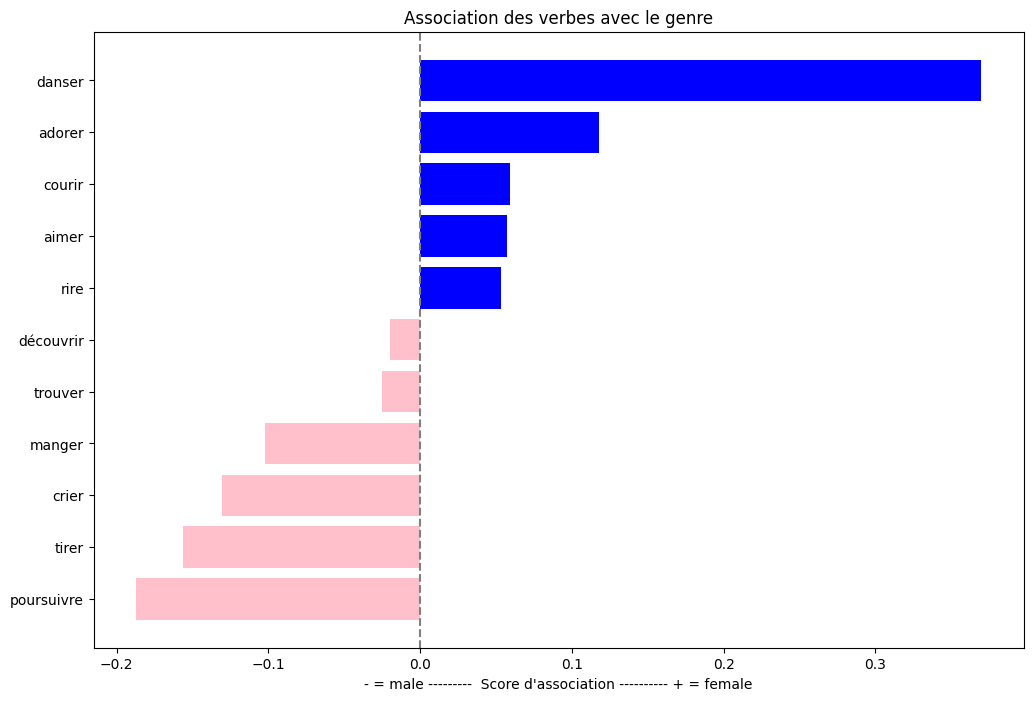

In [103]:
import matplotlib.pyplot as plt

sorted_verbs = sorted(scores_association.items(), key=lambda x: x[1])
verbes, scores = zip(*sorted_verbs)

plt.figure(figsize=(12, 8))
plt.barh(verbes, scores, color=['blue' if x > 0 else 'pink' for x in scores])
plt.xlabel("- = male ---------  Score d'association ---------- + = female")
plt.title("Association des verbes avec le genre")
plt.axvline(0, color='grey', linestyle='--')
plt.show()

In [ ]:
# + 